Analyse the translation of microbiome-metabolism correlation between mice and human, given the microbiome that we were able to translate (using MGBC tool). 

MICE - OSA
HUMAN - iHMP

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

Load correlation data  

In [2]:
# TODO: Switch to function (instead of loading a file?)

mice_corr_coefficient= pd.read_pickle('mice/haddad_osa/analysis/metabolome_bacteria_corr_coefficient_kendall-tau.pkl')
mice_corr_coefficient = mice_corr_coefficient.unstack(-1)

human_corr_coefficient = pd.read_pickle('human/iHMP_IBDMDB_2019/metabolome_bacteria_corr_coefficient_kendall-tau.pkl')
# Keep only the genus label for simplicity: 

taxa_rename_to_genus = pd.Series(human_corr_coefficient.index.get_level_values(1).unique(), index=human_corr_coefficient.index.get_level_values(1).unique()).str.extract('.*g__(.*)').squeeze()
human_corr_coefficient = human_corr_coefficient.rename(taxa_rename_to_genus.to_dict(), axis=0, level=1)
human_corr_coefficient = human_corr_coefficient.unstack(-1)

In [3]:
mice_corr_coefficient

,14-2,1XD42-69,Acetatifactor,Acutalibacter,Anaerotignum,Anaerotruncus,Angelakisella,CAG-317,CAG-485,CAG-56,...,Marseille-P3106,Merdisoma,NM07-P-09,Pelethomonas,Romboutsia,Roseburia,Schaedlerella,Sporofaciens,Turicibacter,UBA7109
Glycerophosphocholine,0.085105,0.013246,0.205502,0.089424,-0.036973,-0.035448,0.04729,0.20943,-0.08055,0.015771,...,0.100783,-0.071611,0.038229,-0.103848,0.064334,-0.195213,-0.003478,0.005601,-0.107695,-0.015504
gamma-Aminobutyric acid,-0.181265,-0.066739,-0.275698,-0.018609,0.010084,0.145495,-0.070935,-0.024447,0.073046,0.012617,...,-0.203428,0.102084,-0.124373,-0.014908,-0.053675,0.16839,-0.108404,-0.077398,0.113724,0.030736
Guanosine,0.022369,-0.100364,0.03052,-0.044971,-0.186935,-0.196815,-0.13416,0.066822,-0.164103,-0.193456,...,0.007712,-0.164553,0.066774,-0.066452,0.038448,-0.096266,-0.154201,0.000509,0.006303,-0.00952
L-Glutamic acid,0.029054,-0.107496,0.119028,0.0,-0.019909,-0.125391,0.025187,-0.005704,-0.23965,-0.162966,...,-0.022603,-0.158459,-0.016311,-0.101321,-0.070425,-0.242303,0.017391,-0.148685,-0.120849,-0.12539
Hypoxanthine,-0.102588,-0.204294,-0.081387,0.149385,-0.309491,-0.1656,-0.00514,0.029336,-0.229644,-0.322777,...,-0.309796,-0.222959,-0.013253,-0.099805,0.004949,-0.014008,-0.029565,-0.159888,0.004659,0.024208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HMDB0247607,0.010542,-0.013246,0.027468,0.044971,-0.01784,-0.128036,0.146497,0.103492,-0.244653,-0.034696,...,-0.141735,-0.197057,0.057089,-0.209464,-0.177015,-0.296546,-0.029565,-0.163452,-0.244163,-0.057935
HMDB0250631,-0.066078,-0.156405,0.001526,0.013956,-0.164183,-0.122745,-0.03701,0.103492,-0.241651,-0.178211,...,-0.045472,-0.189439,0.053012,-0.167015,0.009517,-0.175543,-0.01855,-0.049392,-0.054533,0.018768
HMDB0254199,-0.099503,0.077438,-0.033572,0.092009,0.087133,0.174065,0.055,-0.04319,0.173108,-0.000526,...,0.043345,0.189439,-0.096338,0.162973,0.199094,0.188657,0.061448,0.068232,0.116464,0.151502
HMDB0259275,0.034196,-0.163537,-0.141919,-0.056859,-0.027665,0.106873,-0.068365,0.097788,-0.075547,0.155606,...,-0.083765,-0.035044,-0.087163,-0.154887,-0.282843,-0.067654,0.035941,-0.022405,-0.044119,0.066095


Data intersection

In [4]:
human_genus = human_corr_coefficient.columns.unique()
mice_genus = mice_corr_coefficient.columns.unique()
print(f"There are {len(mice_genus.intersection(human_genus))} genus shared in the mice and human data. \n"
      f"Out of {len(mice_genus)} genus in mice and {len(human_genus)} genus in human. \n "
      f"AKA {round(len(mice_genus.intersection(human_genus)) / len(mice_genus) * 100, 2)} % of the genus in mice are shared with humans in our ds.")

There are 16 genus shared in the mice and human data. 
Out of 39 genus in mice and 107 genus in human. 
 AKA 41.03 % of the genus in mice are shared with humans in our ds.


In [5]:
mice_metabolites = mice_corr_coefficient.index.get_level_values(0).unique()
human_metabolites = human_corr_coefficient.index.get_level_values(0).unique()
shared_metabolites = human_metabolites.intersection(mice_metabolites)
print(f"Number of shared metabolites: {len(shared_metabolites)}")

Number of shared metabolites: 25


Taxonomic distance mapping based on MGBC closest taxa table 


In [6]:
from translator import MGBC_Translator, Direction, DatabaseClosestTaxa, AggregationFunction
m2h_translator = MGBC_Translator(direction=Direction.M2H, use_database=DatabaseClosestTaxa.taxonomy, aggregation_function=AggregationFunction.majority, short_taxonomic_naming=True)
translation_map = m2h_translator.translation_map()

In [7]:
translation_map.loc[translation_map.index.intersection(mice_genus)]

NM07-P-09                           Parolsenella
CAG-485                                  CAG-485
Duncaniella                          Duncaniella
Erysipelatoclostridium    Erysipelatoclostridium
Faecalibaculum                      Holdemanella
Turicibacter                        Turicibacter
Lactococcus                          Lactococcus
Clostridium                          Clostridium
Anaerotignum                        Anaerotignum
14-2                                      CAG-45
1XD42-69                                1XD42-69
Acetatifactor                      Acetatifactor
CAG-56                                    CAG-56
COE1                                        COE1
Clostridium_Q                      Clostridium_Q
Eubacterium_J                           UBA11774
Kineothrix                                CAG-95
Roseburia                              Roseburia
Schaedlerella                      Schaedlerella
Acutalibacter                      Acutalibacter
Eubacterium_R       

Validate - do we have nans in the mapping?

In [8]:
translation_map.loc[translation_map.index.intersection(mice_genus)].isna().any()

False

Do we have shared genus (mice to human) not included in this mapping? (Just for analysis)

In [9]:
print((~mice_genus.intersection(human_genus).isin(translation_map.index)).any())
print(f"There are {(~mice_genus.intersection(human_genus).isin(translation_map.index)).sum()} genus shared in mice-human dataset that aren't covered in the mapping, out of {mice_genus.intersection(human_genus).shape[0]} shared genus (OSA- iHMP)")

True
There are 5 genus shared in mice-human dataset that aren't covered in the mapping, out of 16 shared genus (OSA- iHMP)


In [10]:
# mice_corr_coefficient, human_corr_coefficient
# translation_map.loc[translation_map.index.intersection(mice_genus)]
osa_translation_map = translation_map.loc[translation_map.index.intersection(mice_genus)]
mice_translated_coefficient = mice_corr_coefficient.loc[shared_metabolites ,osa_translation_map.index].rename(columns=translation_map.loc[translation_map.index.intersection(mice_genus)])

In [11]:
human_corr_coefficient.columns.intersection(osa_translation_map.values).shape

(13,)

In [12]:
human_corr_coefficient.columns

Index(['Acetatifactor', 'Acutalibacter', 'Agathobacter', 'Agathobaculum',
       'Akkermansia', 'Alistipes', 'Alistipes_A', 'Alloprevotella',
       'Anaerobutyricum', 'Anaerostipes',
       ...
       'Tolumonas', 'UBA11524', 'UBA11774', 'UBA1417', 'UBA5026', 'UMGS1375',
       'Veillonella', 'Ventricola', 'Ventrimonas', 'Victivallis'],
      dtype='object', length=107)

In [13]:
tax_rep_index = pd.read_csv('/home/noa/lab_code/MGBC-Toolkit/data/tax_rep_index.tsv', sep='\t', header=None,
                            names=['pid','name', 'taxonomy level', 'taxonomy_label', 'source_pid', 'host', 'number'])

In [14]:
human_genus_in_mgbc_catalog = tax_rep_index[tax_rep_index.host == 'HUMAN'].taxonomy_label.str.extract(
            '.*;g__([^;]+).*').squeeze().unique()

In [15]:
# There are 84 out of 107 genus that are in the UHGG catalog in MGBC toolkit. 
human_corr_coefficient.columns.intersection(human_genus_in_mgbc_catalog).shape

(84,)

In [16]:
# There are 49 out of 107 in the humans dataset that are in the Translation Map. 
human_corr_coefficient.columns.intersection(translation_map.values).shape


(49,)

Out of the 28 we tried to translate from OSA mice genus to Human iHMP human genus, there are 13 genus overlapping (Overlapping between the translated genus and the genus in the human dataset)

In [17]:
osa_translation_map.values

array(['Parolsenella', 'CAG-485', 'Duncaniella', 'Erysipelatoclostridium',
       'Holdemanella', 'Turicibacter', 'Lactococcus', 'Clostridium',
       'Anaerotignum', 'CAG-45', '1XD42-69', 'Acetatifactor', 'CAG-56',
       'COE1', 'Clostridium_Q', 'UBA11774', 'CAG-95', 'Roseburia',
       'Schaedlerella', 'Acutalibacter', 'Eubacterium_R',
       'Intestinimonas', 'Lawsonibacter', 'Marseille-P3106',
       'Anaerotruncus', 'Phocea', 'Emergencia', 'Romboutsia'],
      dtype=object)

Quantify how many of the non-rare taxonomic in mice we were able to map to non-rare taxonomic in human. 

Few suggestion for metrics:
* how much of the translated taxa indeed exists as non-rare taxa in the human cohort ("successfully translated" / "tried to translate") 

In [18]:
discrete_metric = len(human_corr_coefficient.columns.intersection(osa_translation_map.values)) / len(osa_translation_map)


In [19]:
discrete_metric

0.4642857142857143

In [20]:
# TODO: How much this metric (discrete metric) vary when changing the translation method (taxonomic vs. functional?)

Compare the correlation coefficient of the microbiome-metabolomic that overlaps: (25 x 13 tabel of mice, 25 x 13 of humans)

In [21]:
# Align the mice & human index (metabolites) & column (taxa)
shared_taxa = mice_translated_coefficient.columns.intersection(human_corr_coefficient.columns)
human_corr_coefficient = human_corr_coefficient.loc[shared_metabolites, shared_taxa]
mice_translated_coefficient = mice_translated_coefficient.loc[shared_metabolites, shared_taxa]

Let's visualize the heatmap one next to each-other (coefficient) 

[Text(0.5, 1.0, 'Human correlation of Metabolite & Bacteria')]

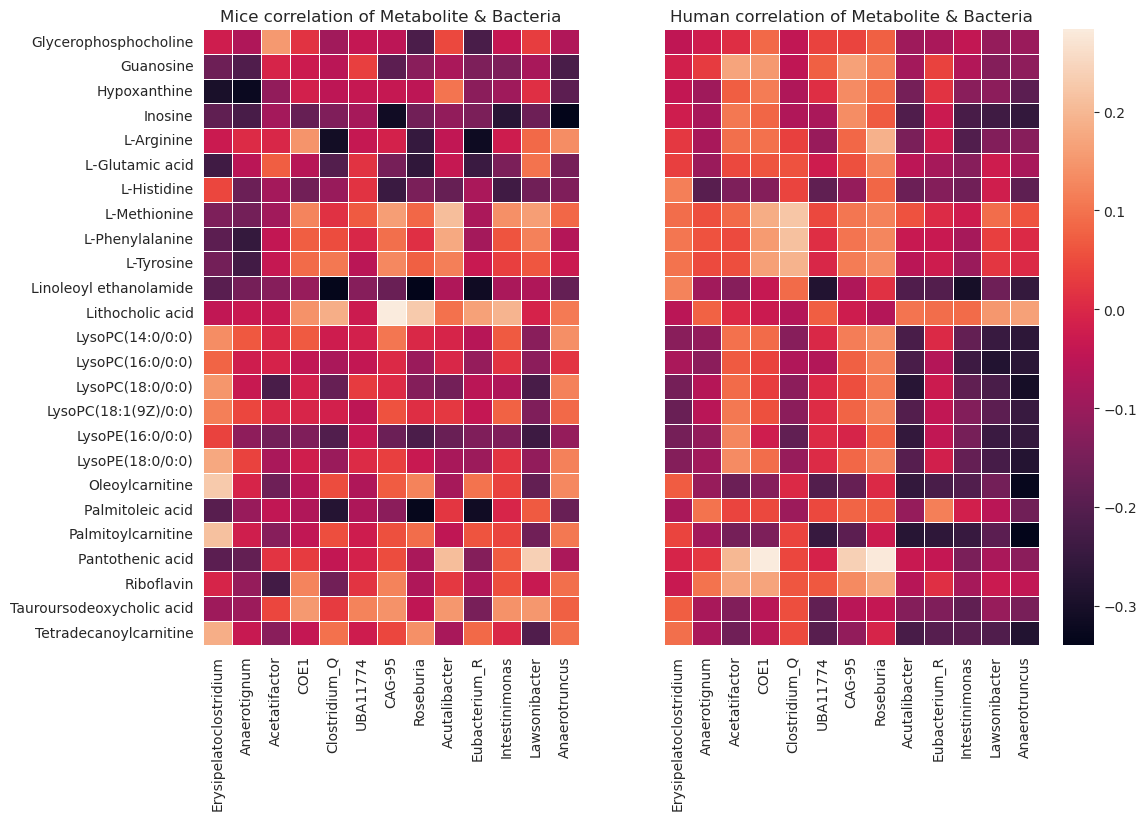

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12,8), gridspec_kw={'width_ratios': [1, 1.25]})
sns.heatmap(mice_translated_coefficient.astype(float), ax=axes[0], cbar=False, linewidth=.5).set(title='Mice correlation of Metabolite & Bacteria')
sns.heatmap(human_corr_coefficient.astype(float), ax=axes[1], yticklabels=False, linewidth=.5).set(title='Human correlation of Metabolite & Bacteria')

Let's visualize the coefficient L1 similarity in a heatmap? 

[Text(0.5, 1.0, '|Mice-Human| coefficient L1 distance')]

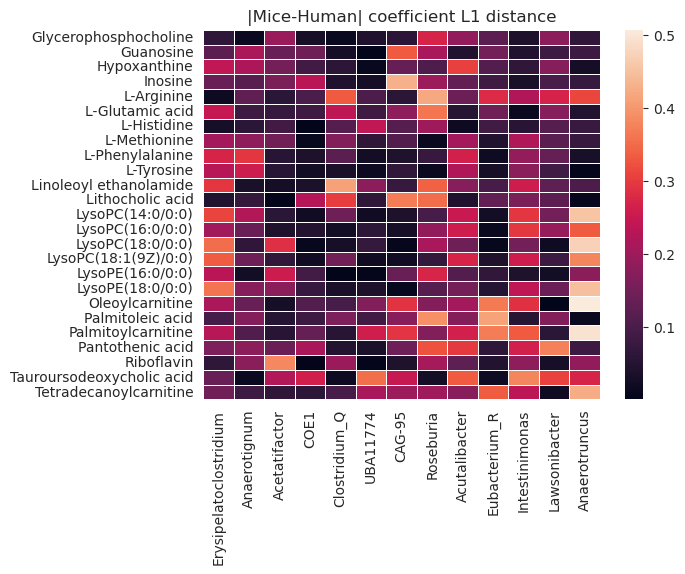

In [23]:
sns.heatmap((mice_translated_coefficient-human_corr_coefficient).abs().astype(float), cbar=True, linewidth=.5).set(title='|Mice-Human| coefficient L1 distance')

Is higher correlation of species i with respect to species j in mice is translated to higher correlation of species i with respect to species j in human (across different metabolites, looking at the metabolites as the samples)
(We can use different metrics: 
Spearman / kendall for ranks, or L1/L2 to measure how well the coefficient themself preserve)

In [24]:
# Kendal tau correlation of correlation
kenal_correlation_of_correlation = pd.Series(index=shared_metabolites)
kenal_p_values = pd.Series(index=shared_metabolites)

for metabolite in shared_metabolites:
    kenal_correlation_of_correlation[metabolite], kenal_p_values[metabolite]  = stats.kendalltau(mice_translated_coefficient.loc[metabolite], human_corr_coefficient.loc[metabolite])

In [25]:
kenal_correlation_of_correlation.sort_values(ascending=False)

Tetradecanoylcarnitine       0.307692
Guanosine                    0.205128
L-Tyrosine                   0.179487
L-Histidine                  0.141938
Palmitoylcarnitine           0.116131
Oleoylcarnitine              0.116131
Hypoxanthine                 0.102564
Inosine                      0.102564
LysoPC(14:0/0:0)             0.051282
L-Methionine                 0.025641
LysoPC(18:0/0:0)             0.000000
L-Arginine                   0.000000
L-Phenylalanine             -0.025641
LysoPE(16:0/0:0)            -0.025641
LysoPE(18:0/0:0)            -0.076923
Pantothenic acid            -0.076923
Glycerophosphocholine       -0.076923
Lithocholic acid            -0.102564
L-Glutamic acid             -0.102564
Tauroursodeoxycholic acid   -0.128205
LysoPC(18:1(9Z)/0:0)        -0.153846
LysoPC(16:0/0:0)            -0.179487
Riboflavin                  -0.256410
Palmitoleic acid            -0.270973
Linoleoyl ethanolamide      -0.384615
dtype: float64

In [26]:
kenal_p_values

Glycerophosphocholine        0.765025
Guanosine                    0.367404
Hypoxanthine                 0.675433
Inosine                      0.675433
L-Arginine                   1.000000
L-Glutamic acid              0.675433
L-Histidine                  0.501361
L-Methionine                 0.952362
L-Phenylalanine              0.952362
L-Tyrosine                   0.435380
Linoleoyl ethanolamide       0.076317
Lithocholic acid             0.675433
LysoPC(14:0/0:0)             0.857734
LysoPC(16:0/0:0)             0.435380
LysoPC(18:0/0:0)             1.000000
LysoPC(18:1(9Z)/0:0)         0.509775
LysoPE(16:0/0:0)             0.952362
LysoPE(18:0/0:0)             0.765025
Oleoylcarnitine              0.582248
Palmitoleic acid             0.199290
Palmitoylcarnitine           0.582248
Pantothenic acid             0.765025
Riboflavin                   0.251858
Tauroursodeoxycholic acid    0.590041
Tetradecanoylcarnitine       0.163487
dtype: float64

In [27]:
# Spearman correlation of correlation
Spearman_correlation_of_correlation = pd.Series(index=shared_metabolites)
Spearman_p_values = pd.Series(index=shared_metabolites)

for metabolite in shared_metabolites:
    Spearman_correlation_of_correlation[metabolite], Spearman_p_values[metabolite]  = stats.spearmanr(mice_translated_coefficient.loc[metabolite], human_corr_coefficient.loc[metabolite])

In [28]:
Spearman_correlation_of_correlation.sort_values(ascending=False)

Tetradecanoylcarnitine       0.472527
Guanosine                    0.285714
L-Tyrosine                   0.263736
L-Histidine                  0.217332
Inosine                      0.175824
Oleoylcarnitine              0.151307
Palmitoylcarnitine           0.148556
Hypoxanthine                 0.093407
L-Methionine                 0.071429
LysoPC(14:0/0:0)             0.060440
LysoPE(16:0/0:0)             0.032967
LysoPC(18:0/0:0)            -0.038462
L-Arginine                  -0.049451
LysoPE(18:0/0:0)            -0.060440
L-Phenylalanine             -0.065934
Glycerophosphocholine       -0.098901
Pantothenic acid            -0.170330
Tauroursodeoxycholic acid   -0.170330
Lithocholic acid            -0.192308
L-Glutamic acid             -0.197802
LysoPC(16:0/0:0)            -0.214286
LysoPC(18:1(9Z)/0:0)        -0.258242
Palmitoleic acid            -0.283357
Riboflavin                  -0.307692
Linoleoyl ethanolamide      -0.527473
dtype: float64

In [29]:
Spearman_p_values

Glycerophosphocholine        0.747868
Guanosine                    0.344000
Hypoxanthine                 0.761500
Inosine                      0.565580
L-Arginine                   0.872544
L-Glutamic acid              0.517131
L-Histidine                  0.475697
L-Methionine                 0.816628
L-Phenylalanine              0.830542
L-Tyrosine                   0.383937
Linoleoyl ethanolamide       0.063955
Lithocholic acid             0.529068
LysoPC(14:0/0:0)             0.844502
LysoPC(16:0/0:0)             0.482054
LysoPC(18:0/0:0)             0.900724
LysoPC(18:1(9Z)/0:0)         0.394284
LysoPE(16:0/0:0)             0.914856
LysoPE(18:0/0:0)             0.844502
Oleoylcarnitine              0.621707
Palmitoleic acid             0.348172
Palmitoylcarnitine           0.628132
Pantothenic acid             0.577975
Riboflavin                   0.306447
Tauroursodeoxycholic acid    0.577975
Tetradecanoylcarnitine       0.102981
dtype: float64

Out of the 25 metabolites, we see one metabolite that the correlation-of-correlation is higher then the other (Tetradecanoylcarnitine) but it's not significant statistically. 
According to Pubchem Tetradecanoylcarnitine is produced by Saccharomyces fungi: https://pubchem.ncbi.nlm.nih.gov/compound/Tetradecanoylcarnitine

In [34]:
metabolites_feces_from_microbial_origin_hmdb = pd.read_csv('metabolites_feces_from_microbial_origin_hmdb')
print('Tetradecanoylcarnitine' in metabolites_feces_from_microbial_origin_hmdb.NAME)


False


In [39]:
# L1 
(mice_translated_coefficient - human_corr_coefficient).abs().mean(axis=1).sort_values(ascending=True)

L-Histidine                  0.092027
L-Tyrosine                   0.093853
Glycerophosphocholine        0.098776
LysoPE(16:0/0:0)             0.110483
L-Phenylalanine              0.120086
L-Methionine                 0.120813
Guanosine                    0.122631
Riboflavin                   0.126525
Hypoxanthine                 0.129898
Inosine                      0.136283
L-Glutamic acid              0.136682
LysoPC(16:0/0:0)             0.140069
LysoPC(18:0/0:0)             0.140106
LysoPC(18:1(9Z)/0:0)         0.142836
Lithocholic acid             0.145266
LysoPE(18:0/0:0)             0.154702
Palmitoleic acid             0.155862
LysoPC(14:0/0:0)              0.16066
Linoleoyl ethanolamide       0.165751
Tetradecanoylcarnitine       0.172942
Pantothenic acid             0.179088
L-Arginine                   0.187459
Oleoylcarnitine              0.198514
Tauroursodeoxycholic acid    0.199559
Palmitoylcarnitine           0.217029
dtype: object

Does question like: Which species correlates the most with the metabolite preserve between hosts? (For some metabolites?)

In [45]:
pd.DataFrame({"Mice highest corr taxa" : mice_translated_coefficient.astype(float).apply(lambda x: x.idxmax(), axis=1),
              "Human highest corr taxa": human_corr_coefficient.astype(float).apply(lambda x: x.idxmax(), axis=1)})

,Mice highest corr taxa,Human highest corr taxa
Glycerophosphocholine,Acetatifactor,COE1
Guanosine,UBA11774,Acetatifactor
Hypoxanthine,Acutalibacter,CAG-95
Inosine,UBA11774,CAG-95
L-Arginine,COE1,Roseburia
L-Glutamic acid,Lawsonibacter,Roseburia
L-Histidine,Erysipelatoclostridium,Erysipelatoclostridium
L-Methionine,Acutalibacter,Clostridium_Q
L-Phenylalanine,Acutalibacter,Clostridium_Q
L-Tyrosine,CAG-95,Clostridium_Q


Does question like: Which metabolite correlates the most with the species preserve between hosts? (For some metabolites?)


In [46]:
pd.DataFrame({"Mice highest corr taxa" : mice_translated_coefficient.astype(float).apply(lambda x: x.idxmax(), axis=0),
              "Human highest corr taxa": human_corr_coefficient.astype(float).apply(lambda x: x.idxmax(), axis=0)})

,Mice highest corr taxa,Human highest corr taxa
Erysipelatoclostridium,Oleoylcarnitine,Linoleoyl ethanolamide
Anaerotignum,LysoPC(14:0/0:0),Riboflavin
Acetatifactor,Glycerophosphocholine,Pantothenic acid
COE1,Tauroursodeoxycholic acid,Pantothenic acid
Clostridium_Q,Lithocholic acid,L-Methionine
UBA11774,Tauroursodeoxycholic acid,Guanosine
CAG-95,Lithocholic acid,Pantothenic acid
Roseburia,Lithocholic acid,Pantothenic acid
Acutalibacter,Pantothenic acid,Lithocholic acid
Eubacterium_R,Lithocholic acid,Palmitoleic acid


<Axes: title={'center': 'Kendall tau coefficient in mice'}, ylabel='Frequency'>

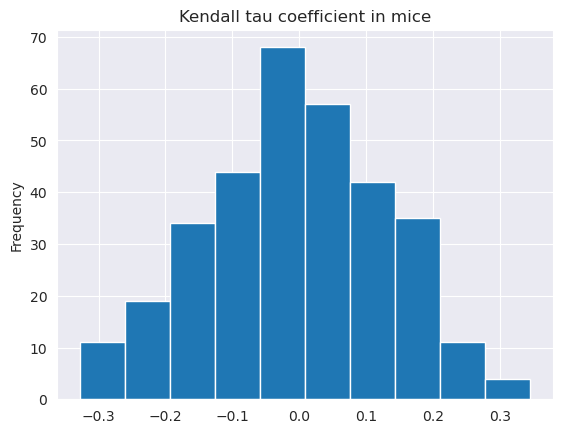

In [55]:
mice_translated_coefficient.stack().astype(float).plot.hist(title='Kendall tau coefficient in mice')

Lets look on the microbiome-metabolome correlation as a classification task, 
Will define Coeff > 0.2 as 'Positive correlation' / 'correlation'
Coeff < -0.2 as 'Negative correlation' / 'correlation'
-0.2 < Coeff < 0.2 not correlated. 

How much correlation/not correlation in mice can be a predictor for correlation/not correlation in human?

<Axes: title={'center': 'Kendall tau coefficient in humans'}, ylabel='Frequency'>

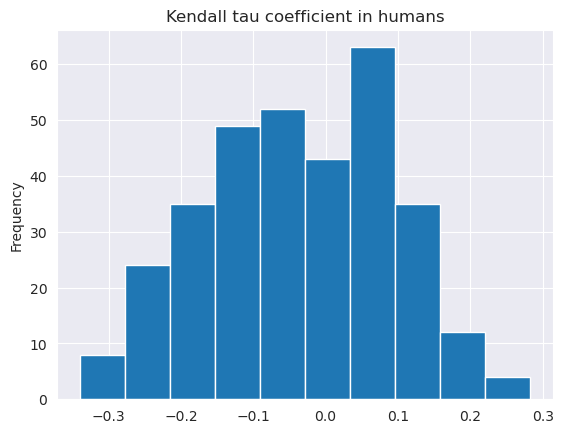

In [57]:
human_corr_coefficient.stack().astype(float).plot.hist(title='Kendall tau coefficient in humans')


In [71]:
(mice_translated_coefficient.abs() > 0.2).mean(axis=1)

Glycerophosphocholine        0.076923
Guanosine                    0.000000
Hypoxanthine                 0.153846
Inosine                      0.230769
L-Arginine                   0.230769
L-Glutamic acid              0.230769
L-Histidine                  0.153846
L-Methionine                 0.230769
L-Phenylalanine              0.153846
L-Tyrosine                   0.076923
Linoleoyl ethanolamide       0.230769
Lithocholic acid             0.384615
LysoPC(14:0/0:0)             0.000000
LysoPC(16:0/0:0)             0.000000
LysoPC(18:0/0:0)             0.076923
LysoPC(18:1(9Z)/0:0)         0.000000
LysoPE(16:0/0:0)             0.076923
LysoPE(18:0/0:0)             0.076923
Oleoylcarnitine              0.076923
Palmitoleic acid             0.230769
Palmitoylcarnitine           0.076923
Pantothenic acid             0.153846
Riboflavin                   0.076923
Tauroursodeoxycholic acid    0.230769
Tetradecanoylcarnitine       0.076923
dtype: float64

Using mice correlation of microbiome-metabolism as a predictor to YES/NO correlates in Human. 

In [73]:
((mice_translated_coefficient.abs() > 0.2) == (human_corr_coefficient.abs() > 0.2)).mean(axis=1)

Glycerophosphocholine        0.923077
Guanosine                    1.000000
Hypoxanthine                 0.846154
Inosine                      0.769231
L-Arginine                   0.692308
L-Glutamic acid              0.769231
L-Histidine                  0.846154
L-Methionine                 0.692308
L-Phenylalanine              0.769231
L-Tyrosine                   0.923077
Linoleoyl ethanolamide       0.538462
Lithocholic acid             0.615385
LysoPC(14:0/0:0)             0.769231
LysoPC(16:0/0:0)             0.692308
LysoPC(18:0/0:0)             0.846154
LysoPC(18:1(9Z)/0:0)         0.846154
LysoPE(16:0/0:0)             0.846154
LysoPE(18:0/0:0)             0.769231
Oleoylcarnitine              0.538462
Palmitoleic acid             0.769231
Palmitoylcarnitine           0.538462
Pantothenic acid             0.615385
Riboflavin                   0.923077
Tauroursodeoxycholic acid    0.769231
Tetradecanoylcarnitine       0.692308
dtype: float64

In [76]:
mice_predictions_succeed = ((mice_translated_coefficient.abs() > 0.2) == (human_corr_coefficient.abs() > 0.2))
mice_predictions_succeed

,Erysipelatoclostridium,Anaerotignum,Acetatifactor,COE1,Clostridium_Q,UBA11774,CAG-95,Roseburia,Acutalibacter,Eubacterium_R,Intestinimonas,Lawsonibacter,Anaerotruncus
Glycerophosphocholine,True,True,False,True,True,True,True,True,True,True,True,True,True
Guanosine,True,True,True,True,True,True,True,True,True,True,True,True,True
Hypoxanthine,False,False,True,True,True,True,True,True,True,True,True,True,True
Inosine,True,True,True,True,True,True,False,True,False,True,True,False,True
L-Arginine,True,True,True,True,False,True,True,False,True,False,False,True,True
L-Glutamic acid,False,True,True,True,True,True,True,False,True,False,True,True,True
L-Histidine,True,True,True,True,True,True,False,True,True,True,False,True,True
L-Methionine,True,True,True,True,False,True,False,True,False,True,True,False,True
L-Phenylalanine,True,False,True,True,False,True,True,True,False,True,True,True,True
L-Tyrosine,True,False,True,True,True,True,True,True,True,True,True,True,True


In [77]:
# Lets calculate the accuracy (per metabolite) of the mice as a predictor, and of the naive predictor that says always 'no-correlation'
naive_predictor = pd.DataFrame(False, index=human_corr_coefficient.index, columns=human_corr_coefficient.columns)
naive_predictor_succeed = (naive_predictor == (human_corr_coefficient.abs() > 0.2))

In [81]:
pd.DataFrame({"naive acc": naive_predictor_succeed.mean(axis=1), "mice acc": mice_predictions_succeed.mean(axis=1)})

,naive acc,mice acc
Glycerophosphocholine,1.000000,0.923077
Guanosine,1.000000,1.000000
Hypoxanthine,1.000000,0.846154
Inosine,0.692308,0.769231
L-Arginine,0.923077,0.692308
L-Glutamic acid,1.000000,0.769231
L-Histidine,1.000000,0.846154
L-Methionine,0.923077,0.692308
L-Phenylalanine,0.923077,0.769231
L-Tyrosine,1.000000,0.923077
